In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Semilla para reproducibilidad
np.random.seed(42)
n_samples = 500
paises = ['México', 'Colombia', 'Venezuela']
prob_pais = [0.45, 0.45, 0.1]
np.random.choice(paises, size=n_samples, p=prob_pais)

array(['México', 'Venezuela', 'Colombia', 'Colombia', 'México', 'México',
       'México', 'Colombia', 'Colombia', 'Colombia', 'México',
       'Venezuela', 'Colombia', 'México', 'México', 'México', 'México',
       'Colombia', 'México', 'México', 'Colombia', 'México', 'México',
       'México', 'Colombia', 'Colombia', 'México', 'Colombia', 'Colombia',
       'México', 'Colombia', 'México', 'México', 'Venezuela', 'Venezuela',
       'Colombia', 'México', 'México', 'Colombia', 'México', 'México',
       'Colombia', 'México', 'Venezuela', 'México', 'Colombia', 'México',
       'Colombia', 'Colombia', 'México', 'Venezuela', 'Colombia',
       'Venezuela', 'Colombia', 'Colombia', 'Venezuela', 'México',
       'México', 'México', 'México', 'México', 'México', 'Colombia',
       'México', 'México', 'Colombia', 'México', 'Colombia', 'México',
       'Venezuela', 'Colombia', 'México', 'México', 'Colombia',
       'Colombia', 'Colombia', 'Colombia', 'México', 'México', 'México',
       'Colombi

In [4]:
# --------------------------
# 1. Generación de Datos de la Encuesta Completa
# --------------------------
# Aquí simulamos datos para todas las preguntas de la encuesta.

data = {
    # Sección II: Demográfica y Profesional
    'pais': np.random.choice(paises, size=n_samples, p=prob_pais),
    'genero': np.random.choice(['Masculino', 'Femenino', 'Prefiero no decirlo'], size=n_samples, p=[0.5, 0.45, 0.05]),
    'rango_edad': np.random.choice(['<25', '25-34', '35-44', '45-54', '55+'], size=n_samples, p=[0.1, 0.3, 0.25, 0.2, 0.15]),
    'años_experiencia': np.random.randint(1, 40, size=n_samples),
    'tipo_organizacion': np.random.choice(['Empresa privada', 'Sector público', 'Firma de contabilidad', 'Independiente'], size=n_samples, p=[0.4, 0.1, 0.35, 0.15]),
    'tamaño_empresa': np.random.choice(['1-10', '11-50', '51-200', '201-500', '501+'], size=n_samples, p=[0.2, 0.3, 0.2, 0.15, 0.15]),
    'rol_profesional': np.random.choice(['Asistente', 'Analista', 'Contador', 'Gerente', 'Socio/Director'], size=n_samples, p=[0.2, 0.2, 0.3, 0.2, 0.1]),
    
    # Sección III: Adopción y Uso de IA
    'conocimiento_IA_nivel': np.random.randint(1, 6, size=n_samples), # Pregunta 9
    'uso_herramientas_IA': np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4]),
    'frecuencia_uso_IA': np.random.choice(['Nunca', 'Mensual', 'Semanal', 'Diario'], size=n_samples, p=[0.6, 0.2, 0.1, 0.1]),
    'herramientas_uso': [np.random.choice(['Excel', 'QuickBooks', 'Xero', 'Chatbots', 'Software AI'], size=np.random.randint(1, 4), replace=False) for _ in range(n_samples)],

    # Sección IV: Percepción de la IA (Preguntas 13-21)
    **{f'percepcion_IA_{i}': np.random.randint(1, 6, size=n_samples) for i in range(13, 22)},

    # Sección V: Impacto en la Profesión (Preguntas 22-28)
    **{f'impacto_IA_{i}': np.random.randint(1, 6, size=n_samples) for i in range(22, 29)},

    # Sección VI: Barreras y Facilitadores (Preguntas 29-32)
    **{f'barrera_IA_{i}': np.random.randint(1, 6, size=n_samples) for i in range(29, 33)},
    
    # Sección VII: Preparación para el Futuro
    'interes_IA_nivel': np.random.randint(1, 6, size=n_samples), # Pregunta 33
    'habilidades_futuro': [np.random.choice(['Análisis de datos', 'Pensamiento crítico', 'Asesoramiento estratégico', 'Conocimiento TI', 'Habilidades comunicación', 'Ética'], size=np.random.randint(1, 4), replace=False) for _ in range(n_samples)],

    # Sección VIII: Preguntas Abiertas
    'oportunidad_abierta': np.random.choice(["La automatización es clave.", "Mayor eficiencia.", "Mejora en el análisis de datos."], size=n_samples),
    'riesgo_abierta': np.random.choice(["Pérdida de empleos.", "Ciberseguridad.", "Falta de regulación."], size=n_samples),
    'condiciones_abierta': np.random.choice(["Falta de políticas públicas.", "La economía es inestable.", "Falta de inversión en tecnología."], size=n_samples),
    'consejo_abierta': np.random.choice(["Enfócate en habilidades blandas.", "Aprende de datos.", "No le temas a la tecnología."], size=n_samples),
}

df = pd.DataFrame(data)

# Mapear rango de edad a valor numérico para correlación
rango_edad_map = {'<25': 20, '25-34': 30, '35-44': 40, '45-54': 50, '55+': 60}
df['edad_numerica'] = df['rango_edad'].map(rango_edad_map)
df['uso_herramientas_IA_cat'] = df['uso_herramientas_IA'].apply(lambda x: 'Si' if x == 1 else 'No')

print(df)


          pais               genero rango_edad  años_experiencia  \
0     Colombia             Femenino      35-44                18   
1    Venezuela             Femenino        <25                 7   
2       México            Masculino        <25                27   
3     Colombia             Femenino        <25                11   
4       México            Masculino      25-34                37   
..         ...                  ...        ...               ...   
495   Colombia  Prefiero no decirlo      35-44                31   
496     México            Masculino      25-34                24   
497     México             Femenino        55+                25   
498     México            Masculino      45-54                 8   
499  Venezuela             Femenino      45-54                30   

         tipo_organizacion tamaño_empresa rol_profesional  \
0          Empresa privada           1-10        Contador   
1          Empresa privada          11-50         Gerente   




--- Análisis de Relaciones por País ---

======== MÉXICO ========

[Relaciones Categóricas (Chi-Cuadrado)]

[Relaciones Numéricas (Correlación de Pearson)]


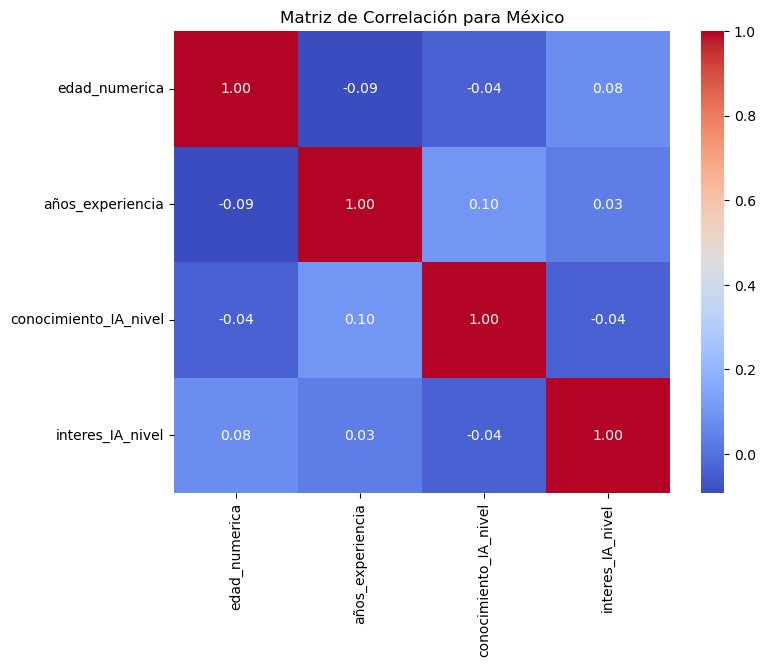


======== COLOMBIA ========

[Relaciones Categóricas (Chi-Cuadrado)]

[Relaciones Numéricas (Correlación de Pearson)]


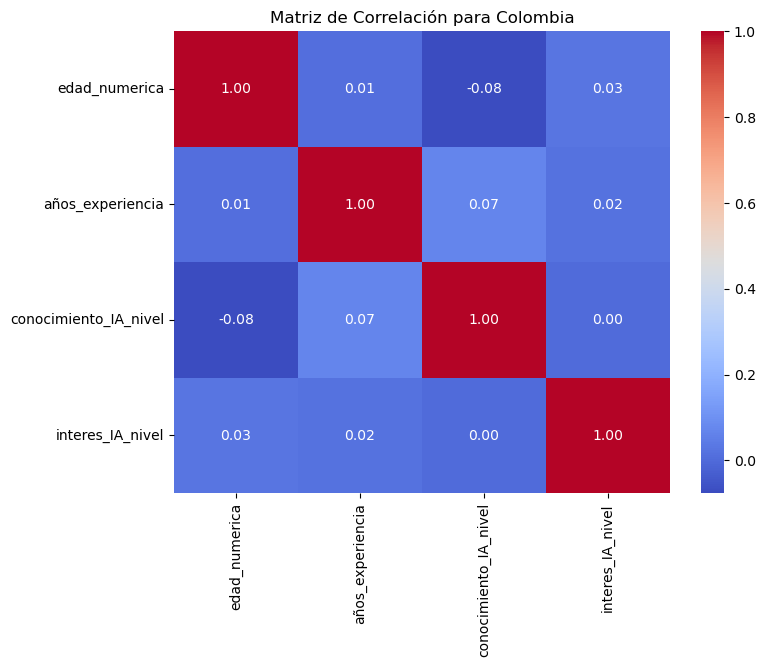


======== VENEZUELA ========

[Relaciones Categóricas (Chi-Cuadrado)]

[Relaciones Numéricas (Correlación de Pearson)]


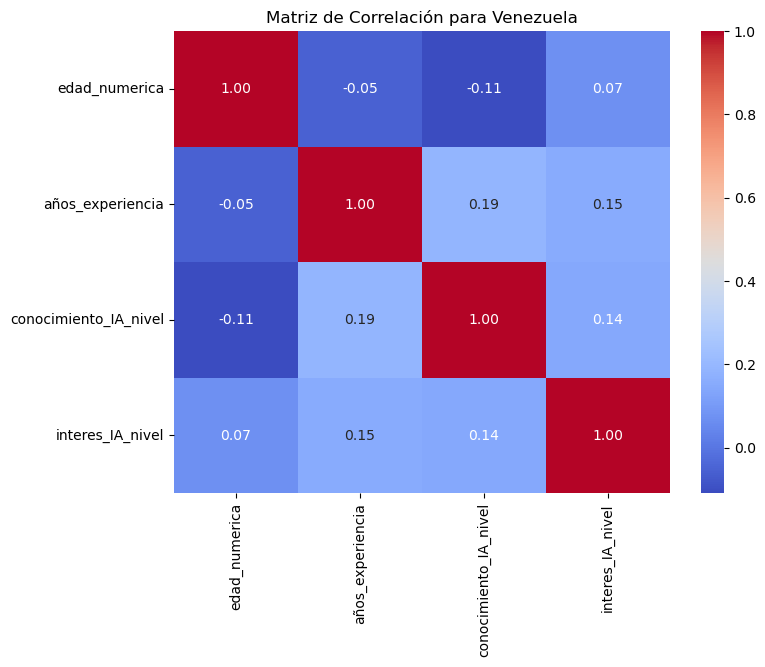

In [5]:
# --------------------------
# 2. Análisis de Relación: Variables Numéricas y Categóricas
# --------------------------

print("\n\n--- Análisis de Relaciones por País ---")
for pais in paises:
    df_pais = df[df['pais'] == pais]
    print(f"\n======== {pais.upper()} ========")

    # Relaciones entre variables categóricas (Chi-Cuadrado)
    print("\n[Relaciones Categóricas (Chi-Cuadrado)]")
    categoricas = ['genero', 'tipo_organizacion', 'uso_herramientas_IA_cat']
    for i in range(len(categoricas)):
        for j in range(i + 1, len(categoricas)):
            var1, var2 = categoricas[i], categoricas[j]
            crosstab = pd.crosstab(df_pais[var1], df_pais[var2])
            if crosstab.min().min() > 0:
                chi2, p, _, _ = chi2_contingency(crosstab)
                if p < 0.05:
                    print(f"  - Relación entre {var1} y {var2} (p={p:.4f})")

    # Relaciones entre variables numéricas (Correlación)
    print("\n[Relaciones Numéricas (Correlación de Pearson)]")
    numericas = ['edad_numerica', 'años_experiencia', 'conocimiento_IA_nivel', 'interes_IA_nivel']
    corr_matrix = df_pais[numericas].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Matriz de Correlación para {pais}')
    plt.show()

In [6]:
# --------------------------
# 3. Comparaciones entre Países (ANOVA & T-tests)
# --------------------------

print("\n\n--- Comparaciones de Medias entre Países ---")
# ANOVA: Conocimiento de IA por País
grupos_conocimiento = [df[df['pais'] == p]['conocimiento_IA_nivel'] for p in paises]
f_stat, p_value_anova = f_oneway(*grupos_conocimiento, nan_policy='omit')
print(f"\n[ANOVA] Conocimiento de IA por País: p-valor = {p_value_anova:.4f}")
print("  - Diferencia significativa si p < 0.05.")

# T-tests: Comparación por Género por País
for pais in paises:
    print(f"\n[T-test] para {pais}")
    df_pais = df[df['pais'] == pais]
    hombres = df_pais[df_pais['genero'] == 'Masculino']['conocimiento_IA_nivel']
    mujeres = df_pais[df_pais['genero'] == 'Femenino']['conocimiento_IA_nivel']
    if len(hombres) > 1 and len(mujeres) > 1:
        t_stat, p_value_ttest = ttest_ind(hombres, mujeres, nan_policy='omit')
        print(f"  - Conocimiento de IA vs. Género: p-valor = {p_value_ttest:.4f}")
        print("    - Diferencia significativa si p < 0.05.")



--- Comparaciones de Medias entre Países ---

[ANOVA] Conocimiento de IA por País: p-valor = 0.5463
  - Diferencia significativa si p < 0.05.

[T-test] para México
  - Conocimiento de IA vs. Género: p-valor = 0.6988
    - Diferencia significativa si p < 0.05.

[T-test] para Colombia
  - Conocimiento de IA vs. Género: p-valor = 0.4512
    - Diferencia significativa si p < 0.05.

[T-test] para Venezuela
  - Conocimiento de IA vs. Género: p-valor = 0.2812
    - Diferencia significativa si p < 0.05.


In [7]:
# --------------------------
# 4. Análisis de Regresión y Coeficientes Beta
# --------------------------
# Este modelo predice el uso de IA (variable binaria)
# basado en otras variables numéricas y categóricas.

print("\n\n--- Análisis de Regresión y Coeficientes Beta ---")
df_reg = df.copy()
# Variables dummy para el modelo de regresión
df_reg = pd.get_dummies(df_reg, columns=['pais', 'genero', 'rango_edad', 'tipo_organizacion', 'tamaño_empresa', 'rol_profesional'], drop_first=True)

# First, ensure mmies() function is defined or imported
# The beginning of your code seems to be missing this part

# Asegurarse de que todas las variables sean numéricas
variables_predictoras = ['conocimiento_IA_nivel', 'interes_IA_nivel', 'años_experiencia', 'edad_numerica'] + list(df_reg.filter(regex='(pais|genero|rango|tipo|tamaño|rol)_').columns)
X = df_reg[variables_predictoras]
y = df_reg['uso_herramientas_IA']

# Convertir explícitamente a tipos numéricos y manejar valores no numéricos
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Eliminar filas con valores NaN
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

# Verificar que no hay valores infinitos - FIX: Ensure numeric types before checking for infinites
# Convert each column individually to handle mixed types
for col in X.columns:
    # Only apply numeric operations to numeric columns
    if pd.api.types.is_numeric_dtype(X[col]):
        X[col] = X[col].replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y[X.index]

# Añadir constante y ajustar el modelo
X = sm.add_constant(X)
# Convertir explícitamente a arrays numpy para evitar problemas de tipo
X_array = np.asarray(X, dtype=float)  # Explicitly convert to float
y_array = np.asarray(y, dtype=float)  # Explicitly convert to float
modelo_logistico = sm.Logit(y_array, X_array).fit()

print("\n[Resumen del Modelo de Regresión Logística]")
print(modelo_logistico.summary())

# Explicación del Coeficiente Beta
print("\n--- Explicación del Coeficiente Beta (ß) ---")
print("El Coeficiente Beta (β) en la tabla del resumen indica la relación entre cada variable predictora y la variable de resultado (`uso_herramientas_IA`).")
print("  - Un β positivo significa que un aumento en la variable predictora (ej. más conocimiento) aumenta la probabilidad de que el resultado ocurra (ej. usar IA).")
print("  - Un β negativo significa que un aumento en la variable predictora disminuye la probabilidad de que el resultado ocurra.")
print("  - La importancia de cada β se evalúa con su p-valor (P>|z|). Si es menor a 0.05, el efecto es estadísticamente significativo.")
print("Por ejemplo, un β = 0.8 en `conocimiento_IA_nivel` con un p-valor de 0.001 (muy bajo) indicaría que el nivel de conocimiento es un predictor fuerte y positivo del uso de la IA.")



--- Análisis de Regresión y Coeficientes Beta ---
Optimization terminated successfully.
         Current function value: 0.671854
         Iterations 6

[Resumen del Modelo de Regresión Logística]
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      477
Method:                           MLE   Df Model:                           22
Date:                Tue, 26 Aug 2025   Pseudo R-squ.:                 0.02852
Time:                        17:00:34   Log-Likelihood:                -335.93
converged:                       True   LL-Null:                       -345.79
Covariance Type:            nonrobust   LLR p-value:                    0.6003
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [14]:
pip install -U textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 2.8 MB/s eta 0:00:00-:--:--
Note: you may need to restart the kernel to use updated packages.


In [16]:
# --------------------------
# 5. Análisis de Sentimiento de Respuestas Abiertas
# --------------------------
def analizar_sentimiento(df_to_analyze, column_name):
    df_with_sentiment = df_to_analyze.copy()
    df_with_sentiment.loc[:, f'sentimiento_{column_name}'] = df_with_sentiment[column_name].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    return df_with_sentiment

print("\n\n--- Análisis de Sentimiento por País ---")
preguntas_abiertas = ['oportunidad_abierta', 'riesgo_abierta', 'condiciones_abierta', 'consejo_abierta']

for pais in paises:
    df_pais = df[df['pais'] == pais].copy()
    print(f"\n[Resultados de Sentimiento para {pais}]")
    for q_abierta in preguntas_abiertas:
        df_pais = analizar_sentimiento(df_pais, q_abierta)
        promedio = df_pais[f'sentimiento_{q_abierta}'].mean()
        
        sentimiento_etiqueta = "Neutral"
        if promedio > 0.1:
            sentimiento_etiqueta = "Positivo"
        elif promedio < -0.1:
            sentimiento_etiqueta = "Negativo"
            
        print(f"  - Sentimiento de '{q_abierta}': Polaridad promedio = {promedio:.2f} ({sentimiento_etiqueta})")



--- Análisis de Sentimiento por País ---

[Resultados de Sentimiento para México]
  - Sentimiento de 'oportunidad_abierta': Polaridad promedio = 0.00 (Neutral)
  - Sentimiento de 'riesgo_abierta': Polaridad promedio = 0.00 (Neutral)
  - Sentimiento de 'condiciones_abierta': Polaridad promedio = 0.00 (Neutral)
  - Sentimiento de 'consejo_abierta': Polaridad promedio = 0.00 (Neutral)

[Resultados de Sentimiento para Colombia]
  - Sentimiento de 'oportunidad_abierta': Polaridad promedio = 0.00 (Neutral)
  - Sentimiento de 'riesgo_abierta': Polaridad promedio = 0.00 (Neutral)
  - Sentimiento de 'condiciones_abierta': Polaridad promedio = 0.00 (Neutral)
  - Sentimiento de 'consejo_abierta': Polaridad promedio = 0.00 (Neutral)

[Resultados de Sentimiento para Venezuela]
  - Sentimiento de 'oportunidad_abierta': Polaridad promedio = 0.00 (Neutral)
  - Sentimiento de 'riesgo_abierta': Polaridad promedio = 0.00 (Neutral)
  - Sentimiento de 'condiciones_abierta': Polaridad promedio = 0.00 (Neu